In [1]:
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import random

from tqdm.notebook import tqdm as log_progress

In [22]:
#load and clean data
data_file_name = "data.txt"
SEQUENCE_LENGTH = 10 #how many items are fed into the ai per sequence

raw = open("data/" + data_file_name, "r", encoding='utf-8')

lines = []
print("Loading data...")
for line in log_progress(raw):
    if str(line) != '\n':
        lines.append(str(line).lower())

print("Tokenizing...")
#putting the entirety of the input data into one string
text = ""
for line in log_progress(lines):
    text += line
#tokenizer = RegexpTokenizer(r'[a-zA-Z]')
tokenizer = RegexpTokenizer(r'\w+')
tokenized = tokenizer.tokenize(text)

#converting the text into numbers to be processed by the embedding layer of the model
words = [] #one of each word in tokenized will be in here
filtering = lambda x : not x in words #for finding if the word should be added to the words array
find = lambda x : words.index(x) if x in words else len(words) #convert each word into a number. -1 means that the item isn't in the vocabulary

print("Finding every unique word...")
for word in log_progress(tokenized):
    if filtering(word):
        words.append(word)

#x data is every single word in the data set, in order
#y data is every single word that comes after the corresponding x value
x = []
y = []
print("Compiling dataset...")
counter = 0
for i in log_progress(range(int(len(tokenized)/SEQUENCE_LENGTH))):
    temp = []
    for j in range(0, SEQUENCE_LENGTH):
        if counter + j >= len(tokenized):
            while len(temp) < SEQUENCE_LENGTH:
                temp.append(0)
            break
        else:
            temp.append(find(tokenized[counter+j]))
    
    counter += SEQUENCE_LENGTH - 1
    x.append(temp)
    
    if counter+SEQUENCE_LENGTH < len(tokenized):
        y.append(find(tokenized[counter+SEQUENCE_LENGTH]))
    else:
        y.append(find(tokenized[0]))

x = np.asarray(x, np.int32)
y = np.asarray(y, np.int32)

x = np.reshape(x, (x.shape[0], SEQUENCE_LENGTH, 1))
y = to_categorical(y)

print(x.shape)
print(y.shape)

vocab_size = len(words)

Loading data...


0it [00:00, ?it/s]

Tokenizing...


  0%|          | 0/2309 [00:00<?, ?it/s]

Finding every unique word...


  0%|          | 0/18314 [00:00<?, ?it/s]

Compiling dataset...


  0%|          | 0/1831 [00:00<?, ?it/s]

(1831, 10, 1)
(1831, 2988)


In [23]:
#create and compile model
model = Sequential()

model.add(Embedding(vocab_size+1, 24, input_length=SEQUENCE_LENGTH)) #embedding: size of vocabulary, dimension of each value
model.add(LSTM(40, dropout=0.01))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(y.shape[1], activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 24)            76896     
                                                                 
 lstm_2 (LSTM)               (None, 40)                10400     
                                                                 
 dense_4 (Dense)             (None, 32)                1312      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 2988)              98604     
                                                                 
Total params: 187,212
Trainable params: 187,212
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
19/19 [==============================] - 2s 43ms/step - loss: 7.9932 - accuracy: 0.0132 - val_loss: 7.9756 - val_accuracy: 0.0000e+00
Epoch 2/200
19/19 [==============================] - 0s 15ms/step - loss: 7.8851 - accuracy: 0.0166 - val_loss: 7.6086 - val_accuracy: 0.0000e+00
Epoch 3/200
19/19 [==============================] - 0s 11ms/step - loss: 6.7086 - accuracy: 0.0166 - val_loss: 6.4794 - val_accuracy: 0.0000e+00
Epoch 4/200
19/19 [==============================] - 0s 10ms/step - loss: 6.0208 - accuracy: 0.0243 - val_loss: 6.5147 - val_accuracy: 0.0000e+00
Epoch 5/200
19/19 [==============================] - 0s 9ms/step - loss: 5.9390 - accuracy: 0.0309 - val_loss: 6.5368 - val_accuracy: 0.0000e+00
Epoch 6/200
19/19 [==============================] - 0s 8ms/step - loss: 5.9119 - accuracy: 0.0292 - val_loss: 6.5758 - val_accuracy: 0.0000e+00
Epoch 7/200
19/19 [==============================] - 0s 8ms/step - loss: 5.9040 - accuracy: 0.0304 - val_loss: 6.5840 - val_ac

19/19 [==============================] - 0s 9ms/step - loss: 4.3273 - accuracy: 0.0513 - val_loss: 17.7945 - val_accuracy: 0.0000e+00
Epoch 58/200
19/19 [==============================] - 0s 9ms/step - loss: 4.2143 - accuracy: 0.0646 - val_loss: 18.3347 - val_accuracy: 0.0000e+00
Epoch 59/200
19/19 [==============================] - 0s 9ms/step - loss: 4.1355 - accuracy: 0.0629 - val_loss: 18.6834 - val_accuracy: 0.0000e+00
Epoch 60/200
19/19 [==============================] - 0s 9ms/step - loss: 4.0868 - accuracy: 0.0508 - val_loss: 19.4202 - val_accuracy: 0.0000e+00
Epoch 61/200
19/19 [==============================] - 0s 9ms/step - loss: 4.0259 - accuracy: 0.0734 - val_loss: 19.7977 - val_accuracy: 0.0000e+00
Epoch 62/200
19/19 [==============================] - 0s 8ms/step - loss: 3.9678 - accuracy: 0.0706 - val_loss: 20.2565 - val_accuracy: 0.0000e+00
Epoch 63/200
19/19 [==============================] - 0s 8ms/step - loss: 3.9189 - accuracy: 0.0861 - val_loss: 20.6430 - val_accur

Epoch 113/200
19/19 [==============================] - 0s 8ms/step - loss: 2.1432 - accuracy: 0.3996 - val_loss: 39.5244 - val_accuracy: 0.0000e+00
Epoch 114/200
19/19 [==============================] - 0s 8ms/step - loss: 2.1498 - accuracy: 0.4007 - val_loss: 40.1766 - val_accuracy: 0.0000e+00
Epoch 115/200
19/19 [==============================] - 0s 8ms/step - loss: 2.1126 - accuracy: 0.4255 - val_loss: 40.5616 - val_accuracy: 0.0000e+00
Epoch 116/200
19/19 [==============================] - 0s 8ms/step - loss: 2.1053 - accuracy: 0.4299 - val_loss: 40.2732 - val_accuracy: 0.0000e+00
Epoch 117/200
19/19 [==============================] - 0s 8ms/step - loss: 2.0567 - accuracy: 0.4404 - val_loss: 41.1846 - val_accuracy: 0.0000e+00
Epoch 118/200
19/19 [==============================] - 0s 8ms/step - loss: 2.0493 - accuracy: 0.4454 - val_loss: 41.7303 - val_accuracy: 0.0000e+00
Epoch 119/200
19/19 [==============================] - 0s 8ms/step - loss: 2.0089 - accuracy: 0.4470 - val_loss:

19/19 [==============================] - 0s 8ms/step - loss: 1.0063 - accuracy: 0.7511 - val_loss: 55.3137 - val_accuracy: 0.0000e+00
Epoch 169/200
19/19 [==============================] - 0s 7ms/step - loss: 0.9808 - accuracy: 0.7859 - val_loss: 55.2207 - val_accuracy: 0.0000e+00
Epoch 170/200
19/19 [==============================] - 0s 9ms/step - loss: 0.9428 - accuracy: 0.7914 - val_loss: 54.2643 - val_accuracy: 0.0000e+00
Epoch 171/200
19/19 [==============================] - 0s 8ms/step - loss: 0.9715 - accuracy: 0.7743 - val_loss: 54.9487 - val_accuracy: 0.0000e+00
Epoch 172/200
19/19 [==============================] - 0s 8ms/step - loss: 0.9711 - accuracy: 0.7688 - val_loss: 55.4520 - val_accuracy: 0.0000e+00
Epoch 173/200
19/19 [==============================] - 0s 8ms/step - loss: 0.8938 - accuracy: 0.8085 - val_loss: 55.0832 - val_accuracy: 0.0000e+00
Epoch 174/200
19/19 [==============================] - 0s 8ms/step - loss: 0.8440 - accuracy: 0.8317 - val_loss: 55.1331 - val

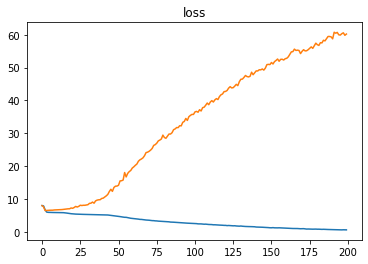

In [24]:
#train model
hist = model.fit(x, y, epochs=200, verbose=1, batch_size=100, validation_split=0.01)
model.save("shakespear2.0.h5")

plt.title("loss")
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

In [25]:
#test model
sample_length = 100
model = load_model("shakespeare2.0.h5")

#get input sentence and process
sentence = input("Enter first 10 words...").lower()
tokenizer = RegexpTokenizer(r'\w+')
root = tokenizer.tokenize(sentence)
root = [find(root[i]) for i in range(len(root))]

output = sentence + " "

for i in log_progress(range(sample_length)):
    tmp = np.array(root)
    tmp = np.reshape(tmp, (1, SEQUENCE_LENGTH, 1))
    pred = model.predict(tmp, verbose=0)
    next_word = pred.argmax()
    #next_word = np.random.choice(len(pred[0]), p=pred[0])
    output += words[next_word] + " "
    root.pop(0)
    root.append(next_word) #setting the next word

print(output)

OSError: No file or directory found at shakespeare2.0.h5